In [1]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from skimage.transform import resize


# **EDA**

## **Feature Extraction**
*    **MFCCs (Mel-Frequency Cepstral Coefficients):**
        MFCCs are a representation of the short-term power spectrum of a sound.
        They are commonly used in speech and sound recognition tasks.
        In this code, we are extracting 20 MFCC coefficients using the librosa.feature.mfcc() function.

*    **Spectral Centroid:**
        Spectral centroid indicates where the center of mass of the spectrum is located.
        It provides insights into the brightness of a sound.
        In this code, we are extracting the spectral centroid using the librosa.feature.spectral_centroid() function.

*    **Spectral Rolloff:**
        Spectral rolloff is the frequency below which a certain percentage of the total spectral energy lies.
        It provides information about the shape of the spectral distribution.
        In this code, we are extracting the spectral rolloff using the librosa.feature.spectral_rolloff() function.

*    **Chroma Features:**
        Chroma features capture the energy distribution over pitch classes.
        They are useful for analyzing the harmonic content of audio signals.
        In this code, we are extracting chroma features using the librosa.feature.chroma_stft() function.

### **MFCC (Mel-Frequency Cepstral Coefficients)**
MFCC, or Mel-Frequency Cepstral Coefficients, are a way to represent sound in a way that mimics human hearing. Here's a breakdown of what that means:

*    **Sound as a Wave:** Sound is essentially a wave of pressure variations that travels through the air. We perceive different frequencies (pitches) of sound because these waves have different periodicities (how often the pressure changes).
*    **Human Hearing Isn't Linear:** Our ears aren't equally sensitive to all frequencies. We're more sensitive to mid-range frequencies compared to very low or very high frequencies. This is why we can easily hear someone talking but might need the volume turned up for quiet bass or treble sounds in music.
*    **Mel Scale:** The mel scale is a way to represent frequency in a way that approximates human perception. Lower frequencies are spaced farther apart on the mel scale than higher frequencies, reflecting our increased sensitivity to those mid-range sounds.
*    **Cepstral Coefficients:** A cepstrum is a mathematical transformation that takes a signal (like sound) and converts it to a representation of its spectral envelope (the distribution of energy across different frequencies). Coefficients are numbers that capture the important features of this representation.


In [2]:
def extract_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path)
    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

    # Plot MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()

    return mfccs

#### **Original music**

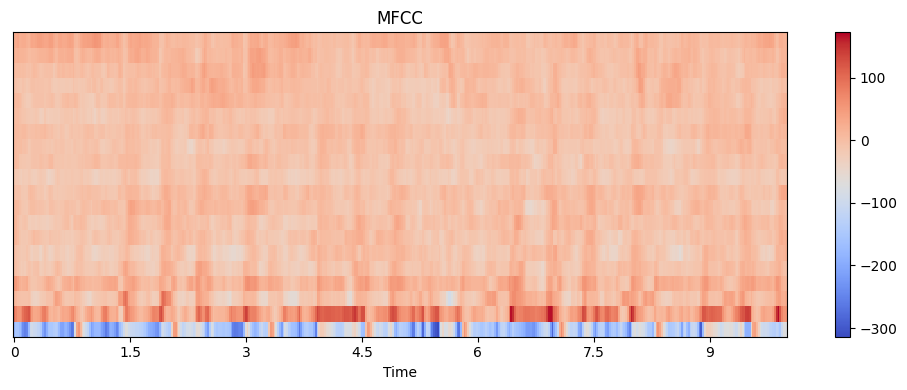

MFCCs shape: (20, 431)


In [3]:
file_path = '/kaggle/input/music-deepfake/final_pop/content/final_pop/clip_100.wav'
mfccs = extract_features(file_path)
print("MFCCs shape:", mfccs.shape)

#### **AI Generated Music**

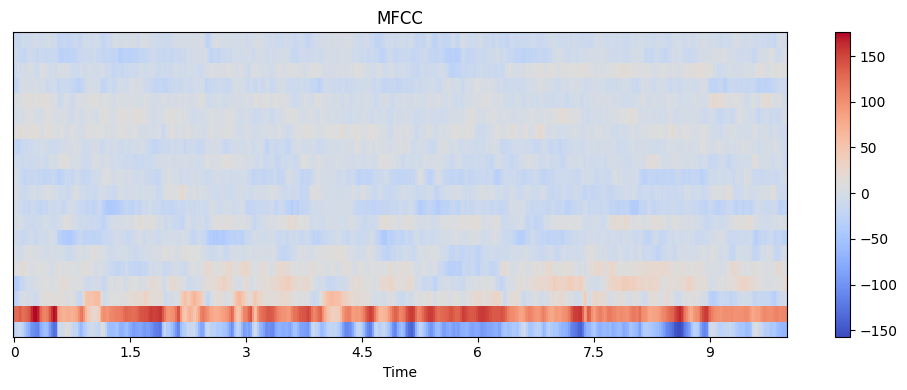

MFCCs shape: (20, 431)


In [4]:
file_path = '/kaggle/input/music-deepfake/final_ai_pop/content/final_ai_pop/kanye ai pop/clip_101.wav'
mfccs = extract_features(file_path)
print("MFCCs shape:", mfccs.shape)

## **Spectral Centroid**

In [5]:
def extract_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path)
    # Extract Spectral Centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

    # Plot Spectral Centroid
    plt.figure(figsize=(10, 4))
    plt.semilogy(spectral_centroid.T, label='Spectral Centroid')
    plt.ylabel('Hz')
    plt.xlabel('Time')
    plt.title('Spectral Centroid')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return spectral_centroid


#### **Original Music**

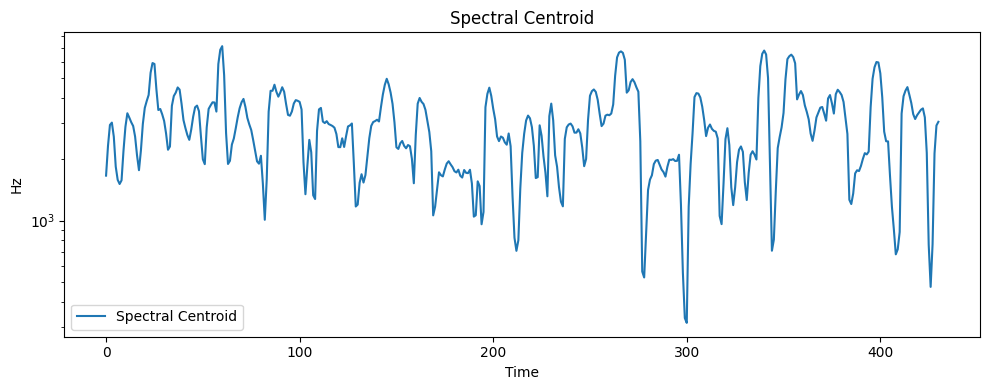

Spectral Centroid shape: (1, 431)


In [6]:
file_path = '/kaggle/input/music-deepfake/final_pop/content/final_pop/clip_100.wav'
spectral_centroid = extract_features(file_path)
print("Spectral Centroid shape:", spectral_centroid.shape)

#### **AI Generated Music**

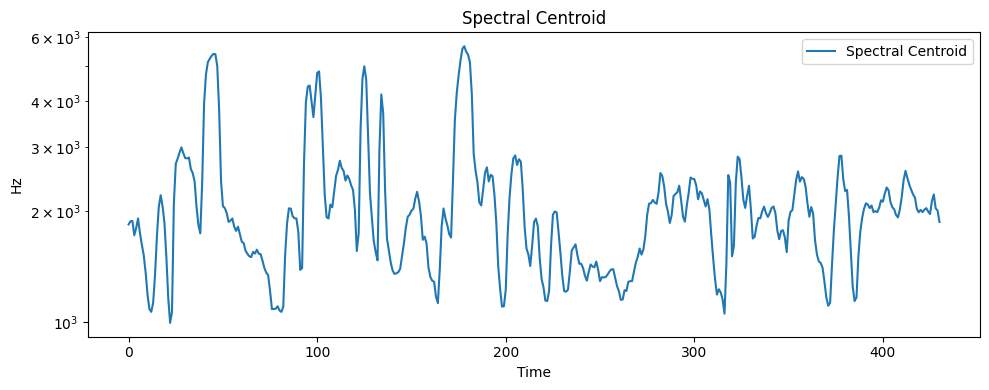

Spectral Centroid shape: (1, 431)


In [7]:
file_path = '/kaggle/input/music-deepfake/final_ai_pop/content/final_ai_pop/kanye ai pop/clip_101.wav'
spectral_centroid = extract_features(file_path)
print("Spectral Centroid shape:", spectral_centroid.shape)

## **Spectral Rolloff**

In [8]:
def extract_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path)
    # Extract Spectral Rolloff
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)

    # Plot Spectral Rolloff
    plt.figure(figsize=(10, 4))
    plt.semilogy(spectral_rolloff.T, label='Spectral Rolloff')
    plt.ylabel('Hz')
    plt.xlabel('Time')
    plt.title('Spectral Rolloff')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return spectral_rolloff


#### **Original Music**

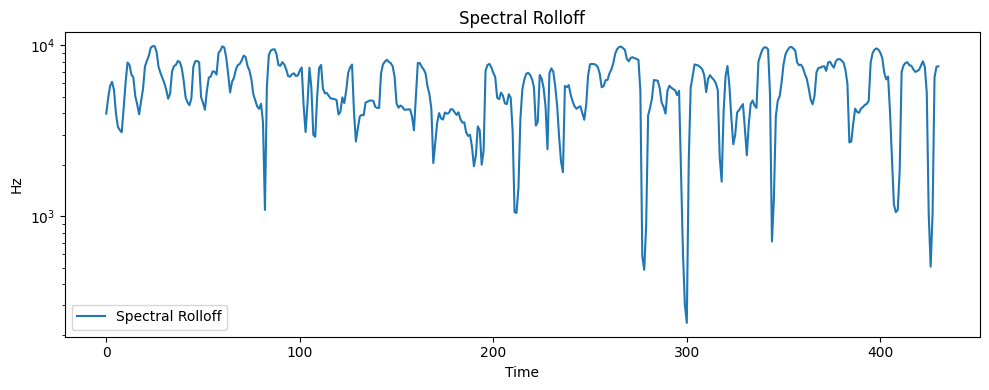

Spectral Centroid shape: (1, 431)


In [9]:
file_path = '/kaggle/input/music-deepfake/final_pop/content/final_pop/clip_100.wav'
spectral_centroid = extract_features(file_path)
print("Spectral Centroid shape:", spectral_centroid.shape)

#### **AI Generated Music**

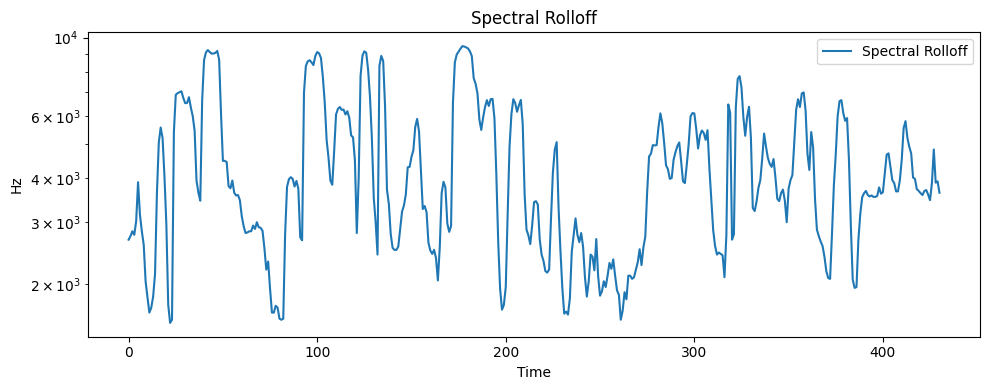

Spectral Centroid shape: (1, 431)


In [10]:
file_path = '/kaggle/input/music-deepfake/final_ai_pop/content/final_ai_pop/kanye ai pop/clip_101.wav'
spectral_centroid = extract_features(file_path)
print("Spectral Centroid shape:", spectral_centroid.shape)

## **Chroma Features**

In [11]:
def extract_chroma_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path)
    # Extract Chroma features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    # Plot Chroma features
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title('Chroma Features')
    plt.tight_layout()
    plt.show()

    return chroma

#### **Original Music**

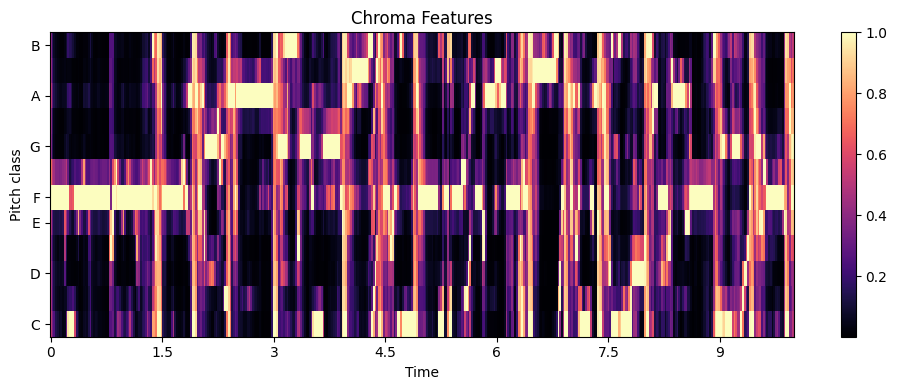

Chroma features shape: (12, 431)


In [12]:
file_path = '/kaggle/input/music-deepfake/final_pop/content/final_pop/clip_100.wav'
chroma = extract_chroma_features(file_path)
print("Chroma features shape:", chroma.shape)

#### **AI Generated Music**

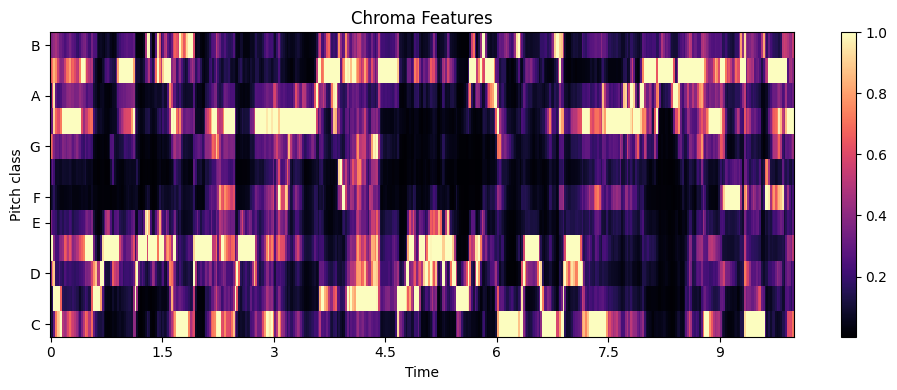

Chroma features shape: (12, 431)


In [13]:
file_path = '/kaggle/input/music-deepfake/final_ai_pop/content/final_ai_pop/kanye ai pop/clip_101.wav'
chroma = extract_chroma_features(file_path)
print("Chroma features shape:", chroma.shape)

# Random Forest Classifier

In [14]:
root_dir = "/kaggle/input/music-deepfake"

# Collect features and labels
X = []
y = []

# Define a function to extract features from a WAV file
def extract_features(file_path):
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    
    # Aggregate statistics for each feature
    mfccs_stats = np.concatenate([np.mean(mfccs, axis=1), np.std(mfccs, axis=1), np.median(mfccs, axis=1)])
    spectral_centroid_stat = np.mean(spectral_centroid)
    spectral_rolloff_stat = np.mean(spectral_rolloff)
    chroma_stft_stats = np.concatenate([np.mean(chroma_stft, axis=1), np.std(chroma_stft, axis=1), np.median(chroma_stft, axis=1)])
    
    # Concatenate all features into a single feature vector
    features = np.concatenate([mfccs_stats, [spectral_centroid_stat, spectral_rolloff_stat], chroma_stft_stats])
    
    return features

# Function to traverse through directories
def traverse_directories(directory):
    for root, dirs, files in os.walk(directory):
        #print(root)
        if "ai" in root.lower():
            print("ai")
            print(root)
        else:
            print("Non ai")
            print(root)
        
        for filename in files:
            if filename.endswith(".wav"):
                file_path = os.path.join(root, filename)
                features = extract_features(file_path)
                X.append(features)
                if "ai" in root.lower():
                    y.append(1)  # 1 represents AI-generated songs
                else:
                    y.append(0)  # 0 represents normal songs

# Traverse through AI-generated songs directory
ai_directory = os.path.join(root_dir, "final_ai_pop", "content", "final_ai_pop")
traverse_directories(ai_directory)

# Traverse through normal songs directory
normal_directory = os.path.join(root_dir, "final_pop", "content", "final_pop")
traverse_directories(normal_directory)

ai
/kaggle/input/music-deepfake/final_ai_pop/content/final_ai_pop
ai
/kaggle/input/music-deepfake/final_ai_pop/content/final_ai_pop/drake ai pop
ai
/kaggle/input/music-deepfake/final_ai_pop/content/final_ai_pop/kanye ai pop
ai
/kaggle/input/music-deepfake/final_ai_pop/content/final_ai_pop/taylor swift ai
ai
/kaggle/input/music-deepfake/final_ai_pop/content/final_ai_pop/Juice world ai pop


/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=220
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Non ai
/kaggle/input/music-deepfake/final_pop/content/final_pop


In [15]:
X_MAIN=X
y_MAIN=y

In [16]:
# Count the occurrences of AI-generated and real songs
num_ai_songs = sum(1 for label in y if label == 1)
num_real_songs = sum(1 for label in y if label == 0)

print("Number of AI-generated songs:", num_ai_songs)
print("Number of real (non-AI) songs:", num_real_songs)



Number of AI-generated songs: 780
Number of real (non-AI) songs: 1499


## Predictions

In [17]:
X = np.array(X)
y = np.array(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


classification_report_output = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_output)

Accuracy: 0.8903508771929824
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       291
           1       0.93      0.76      0.83       165

    accuracy                           0.89       456
   macro avg       0.90      0.86      0.88       456
weighted avg       0.89      0.89      0.89       456



In [18]:
print(X_test)

[[-1.62966644e+02  1.10606911e+02 -9.73090172e+00 ...  2.00228781e-01
   1.28112420e-01  1.56179547e-01]
 [-1.00747620e+02  1.07502014e+02  3.26673660e+01 ...  5.70968464e-02
   4.93205041e-02  1.38597682e-01]
 [ 3.13006821e+01  4.65434189e+01  7.68083191e+00 ...  3.13772321e-01
   2.58102953e-01  2.97196865e-01]
 ...
 [-8.86255417e+01  9.56769257e+01  1.04665356e+01 ...  5.66677511e-01
   4.69246387e-01  4.16779280e-01]
 [-9.18250580e+01  9.22629089e+01  1.32275581e+01 ...  2.11306036e-01
   2.53135055e-01  3.41583669e-01]
 [-1.16157394e+02  7.76922913e+01  2.04321251e+01 ...  6.60680711e-01
   6.60965800e-01  4.45535630e-01]]


In [19]:
print(X,y)

[[-30.84955978  73.62151337   4.39487219 ...   0.2718533    0.31824487
    0.33609554]
 [-12.08503819  99.71494293   9.716362   ...   0.25982887   0.37914795
    0.38575727]
 [-15.55589294  85.23838043  22.69471931 ...   0.37162727   0.37820393
    0.4523477 ]
 ...
 [-46.71629333  98.65700531  20.91457367 ...   0.44523448   0.47651252
    0.56488597]
 [-37.39315796  84.22106171  28.11520004 ...   0.36413214   0.57055449
    0.43048888]
 [ -8.42126179  85.15682983  18.06715965 ...   0.29386842   0.46465379
    0.32065305]] [1 1 1 ... 0 0 0]


In [20]:
x = extract_features("/kaggle/input/another-test/Bebe Rexha-Im A Mess.wav")
x = np.array(x)
x = x.reshape(1, -1)
# print(x)
ypred_1 = classifier.predict(x)
print(ypred_1)

[0]


In [21]:
x = extract_features("/kaggle/input/test-if-this-is-ai/WhatsApp Audio 2024-03-25 at 09.45.41.wav")
x = np.array(x)
x = x.reshape(1, -1)
# print(x)
ypred_1 = classifier.predict(x)
print(ypred_1)

[1]


# SVM

In [23]:
# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Flatten the feature arrays
# X = np.array([x.flatten() for x in X])

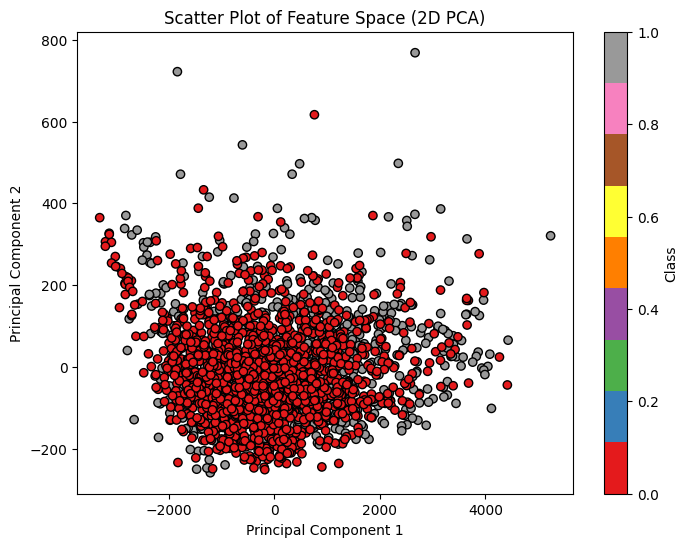

In [24]:
# Perform PCA for dimensionality reduction to 2D
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.title('Scatter Plot of Feature Space (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()


In [25]:
# print(y)

In [26]:
# print(X)

In [27]:
# # plt.scatter(X, y)
# plt.show()

In [28]:
# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Flatten the feature arrays
X = np.array([x.flatten() for x in X])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_classifier = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_report_output = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_output)

Accuracy: 0.6535087719298246
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.97      0.78       291
           1       0.64      0.10      0.17       165

    accuracy                           0.65       456
   macro avg       0.65      0.53      0.47       456
weighted avg       0.65      0.65      0.56       456



In [29]:
x = extract_features("/kaggle/input/another-test/Bebe Rexha-Im A Mess.wav")
print("Shape of x:", np.array(x).shape)


Shape of x: (158,)


In [30]:
x = extract_features("/kaggle/input/another-test/Bebe Rexha-Im A Mess.wav")
x = np.array(x)
x = x.reshape(1, -1)
# print(x)
ypred_1 = svm_classifier.predict(x)
print(ypred_1)

[0]


In [31]:
x = extract_features("/kaggle/input/test-if-this-is-ai/WhatsApp Audio 2024-03-25 at 09.45.41.wav")
x = np.array(x)
x = x.reshape(1, -1)
# print(x)
ypred_1 = svm_classifier.predict(x)
print(ypred_1)

[0]


### AFTER RESAMPLING

In [32]:
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [33]:
# Flatten and concatenate feature arrays for each sample
# X_flat = np.array([np.concatenate(features) for features in X_MAIN])

# Perform oversampling with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_MAIN, y_MAIN)

# Split the resampled dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train an SVM classifier with class weights
svm_classifier = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_output)

Accuracy: 0.8616666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       285
           1       0.87      0.86      0.87       315

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



#### **Original Music**

In [34]:
x = extract_features("/kaggle/input/another-test/Bebe Rexha-Im A Mess.wav")
x = np.array(x)
x = x.reshape(1, -1)
# print(x)
ypred_1 = svm_classifier.predict(x)
print(ypred_1)

[0]


#### **AI Generated Music**

In [35]:
x = extract_features("/kaggle/input/test-if-this-is-ai/WhatsApp Audio 2024-03-25 at 09.45.41.wav")
x = np.array(x)
x = x.reshape(1, -1)
# print(x)
ypred_1 = svm_classifier.predict(x)
print(ypred_1)

[1]


# XGBoost

In [39]:
# Define the root directory
root_dir = "/kaggle/input/music-deepfake"

# Collect features and labels
X = []
y = []

# Define a function to extract features from a WAV file
def extract_features(file_path):
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    
    # Aggregate statistics for each feature
    mfccs_stats = np.concatenate([np.mean(mfccs, axis=1), np.std(mfccs, axis=1), np.median(mfccs, axis=1)])
    spectral_centroid_stat = np.mean(spectral_centroid)
    spectral_rolloff_stat = np.mean(spectral_rolloff)
    chroma_stft_stats = np.concatenate([np.mean(chroma_stft, axis=1), np.std(chroma_stft, axis=1), np.median(chroma_stft, axis=1)])
    
    # Concatenate all features into a single feature vector
    features = np.concatenate([mfccs_stats, [spectral_centroid_stat, spectral_rolloff_stat], chroma_stft_stats])
    
    return features

# Function to traverse through directories
def traverse_directories(directory, label):
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename.endswith(".wav"):
                file_path = os.path.join(root, filename)
                features = extract_features(file_path)
                X.append(features)
                y.append(label)

# Traverse through AI-generated songs directory
ai_directory = os.path.join(root_dir, "final_ai_pop", "content", "final_ai_pop")
traverse_directories(ai_directory, 1)  # Label 1 represents AI-generated songs

# Traverse through normal songs directory
normal_directory = os.path.join(root_dir, "final_pop", "content", "final_pop")
traverse_directories(normal_directory, 0)  # Label 0 represents normal songs

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'max_depth': 6,
    'min_child_weight': 1,
    'eta': 0.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'random_state': 42
}

# Train the XGBoost model
num_round = 100
model = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred_probs = model.predict(dtest)
y_pred = np.round(y_pred_probs)  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_output)


/opt/conda/lib/python3.10/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Accuracy: 0.9144736842105263
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       291
           1       0.91      0.85      0.88       165

    accuracy                           0.91       456
   macro avg       0.91      0.90      0.91       456
weighted avg       0.91      0.91      0.91       456



## Predictions

#### **AI Generated Music**

In [42]:
# Extract features from the "WhatsApp Audio" and "I'm A Mess" song
whatsapp_audio_features = extract_features("/kaggle/input/test-if-this-is-ai/WhatsApp Audio 2024-03-25 at 09.45.41.wav")

# Convert features to DMatrix format for XGBoost prediction
whatsapp_audio_dmatrix = xgb.DMatrix(whatsapp_audio_features.reshape(1, -1))

# Make predictions
whatsapp_audio_prediction = model.predict(whatsapp_audio_dmatrix)

# Print predictions
print("Prediction:", whatsapp_audio_prediction)


Prediction: [0.9958657]


#### **Original Music**

In [43]:
im_a_mess_features = extract_features("/kaggle/input/another-test/Bebe Rexha-Im A Mess.wav")
im_a_mess_dmatrix = xgb.DMatrix(im_a_mess_features.reshape(1, -1))
im_a_mess_prediction = model.predict(im_a_mess_dmatrix)
print("Prediction:", im_a_mess_prediction)


Prediction: [0.00051352]
